In [4]:
import pandas as pd
import yahoofinancials as yf
from yahoofinancials import YahooFinancials
%matplotlib inline  
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./temp_datalab_records_linkedin_company.csv')
#df_job = pd.read_csv('./temp_datalab_records_job_listings.csv', chunksize=200)

In [46]:
df.head(100);

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
5,58382,2015-09-16,UnitedHealth Group,221288,77108,https://www.linkedin.com/company/1720,Hospital & Health Care,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
6,58400,2015-09-16,McKesson,128090,17520,https://www.linkedin.com/company/1900,Hospital & Health Care,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
7,58433,2015-09-16,BBVA,109420,40933,https://www.linkedin.com/company/4860,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
8,58434,2015-09-16,IBM,2542182,414139,https://www.linkedin.com/company/1009,Information Technology and Services,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
9,58401,2015-09-16,MasterCard,147619,9658,https://www.linkedin.com/company/3015,Information Technology and Services,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


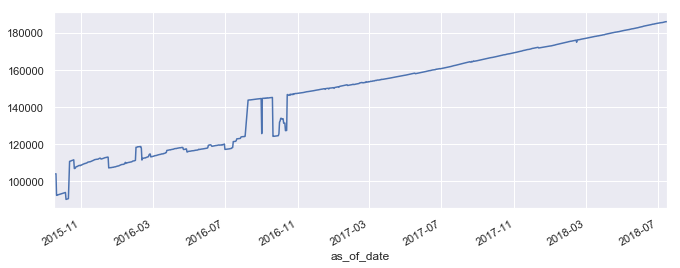

In [43]:
import seaborn as sns
import matplotlib.dates as mdates 
#sns.set(rc={'figure.figsize':(11, 4)})


df_apple = df.loc[df['company_name']=='Apple']
df_apple = df_apple[['as_of_date','employees_on_platform']]

df_apple['as_of_date'] = pd.to_datetime(df_apple['as_of_date'])
df_apple.dtypes
#df_apple['employees_on_platform'].plot(linewidth=0.5);
df_apple = df_apple.set_index('as_of_date')

#fig, ax = plt.subplots(figsize=(9, 7))
#ax.plot(df_apple.index.values, df_apple['employees_on_platform'], '-o', c='b')
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
df_apple['employees_on_platform'].plot(label='# of employees')


#df_apple.plot(grid=True)
#plt.show()  

In [41]:
tech_stocks = ['AAPL', 'MSFT', 'INTC']
bank_stocks = ['WFC', 'BAC', 'C']
yahoo_financials_tech  = YahooFinancials(tech_stocks)
yahoo_financials_banks = YahooFinancials(bank_stocks)

daily_tech_stock_prices = yahoo_financials_tech.get_historical_price_data('2015-09-15', '2017-09-15', 'daily')
daily_bank_stock_prices = yahoo_financials_banks.get_historical_price_data('2015-09-15', '2017-09-15', 'daily')
#daily_prices = daily_bank_stock_prices['WFC']["prices"]
apple_daily_prices = daily_tech_stock_prices['AAPL']["prices"]
#daily_prices

aapl_price = pd.DataFrame.from_dict(apple_daily_prices) #pd.read_json(daily_bank_stock_prices)
aapl_price['formatted_date'] = pd.to_datetime(aapl_price['formatted_date'])
aapl_price = aapl_price.set_index('formatted_date')

aapl_price.dtypes

adjclose    float64
close       float64
date          int64
high        float64
low         float64
open        float64
volume        int64
dtype: object

In [ ]:
daily_bank_stock_prices;

In [1]:
1+1

2

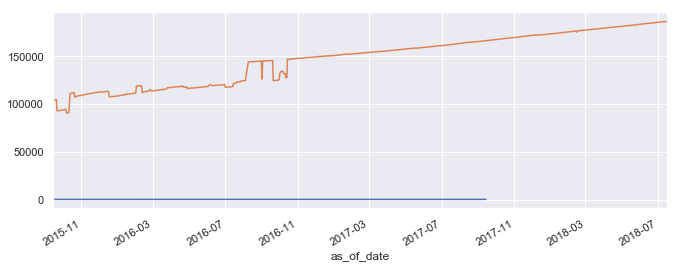

In [45]:
aapl_price['adjclose'].plot(label='stock price')
df_apple['employees_on_platform'].plot(label='# of employees')